# PHYS 105A:  Introduction to Scientific Computing

## Minimization or Maximization

## Problem Definition

* Given a function $f(x)$, where $x$ may be a vector, we want to solve for the value of $x$ such that $f(x)$ is locally or globally a minimum or maximum.

* This seemingly simple problem turns out to be extremely useful

## Applications

* In astronomy, we always want to find the peak of a spectrum, the maximum/minimum points in an image (strong emission/absorption).
      
* In most of the production ready [machine learning applications](https://playground.tensorflow.org/), the machine learning models are also mimimal solutions of some loss function.

## Optimization

* In general, minimizing or maximizing a funciton falls into a field of mathematics called optimization.

* Because so many problems can be made equivalent to optimization problems, it is an extremely popular field with lots of applications.

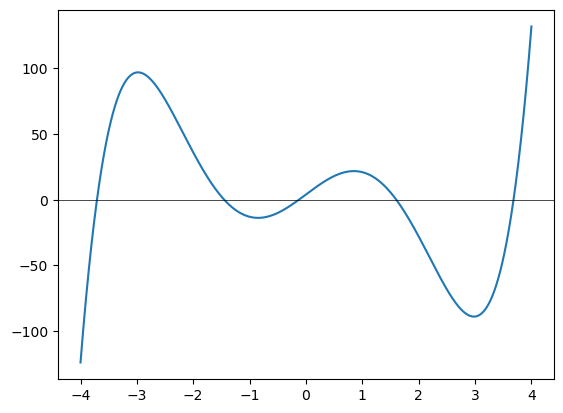

In [19]:
import numpy as np
from matplotlib import pyplot as plt

def h(x):
    return x**5 - 16*x**3 + 32*x + 4

x = np.linspace(-4, 4, 8001)
plt.plot(x, h(x))
plt.axhline(y=0, color='k', lw=0.5)

# The extrema are at:
# Global minimum: -4
# Global maximum: +4
# Local minima: ≈ -1, -3
# Local maxima: ≈ 3, 1

## Gradient Descent Method

* There are many methods for solving the minimum once we have the derivative.

* They have different speed and complexity.  One of the simplest but easiest to implement is gradient descent.

* The idea is very simple:

  * Evaluate the function's derivative at a given point.
  
  * Step toward the "downhill" direction.
  
  * Repeat until the derivative is small enough that you are near a minimum.

In [20]:
def minimize(f, f_x, x, alpha, acc=1e-3, nmax=1000):
    for _ in range(nmax):
        y   = f(x)
        y_x = f_x(x)
        if abs(y_x) <= acc:
            return x         
        x -= alpha * y_x
            
    raise Exception("Too many iterations")

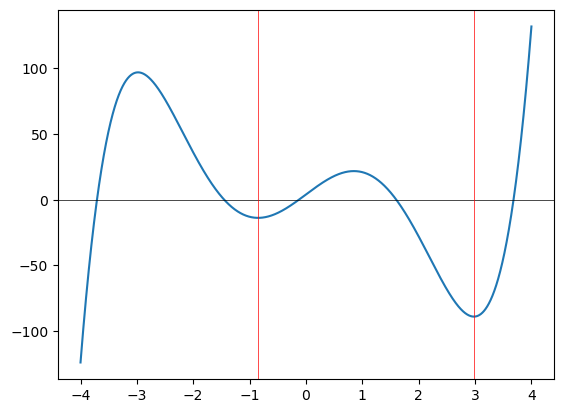

In [21]:
# Let's test it

#def h(x):
#    return x**5 - 16*x**3 + 32*x + 4

def h_x(x):
    return 5 * x**4 - 48 * x**2 + 32
    
m0 = minimize(h, h_x, 0, 1e-3)
m1 = minimize(h, h_x, 2, 1e-3)

x = np.linspace(-4, 4, 8001)
plt.plot(x, h(x))
plt.axhline(y=0,  color='k', lw=0.5)
plt.axvline(x=m0, color='r', lw=0.5)
plt.axvline(x=m1, color='r', lw=0.5)

In [22]:
# Finding maximum is also easy

def maximize(f, f_x, x, alpha, **kwargs):
    def nf(x):
        return -f(x)
    def nf_x(x):
        return -h_x(x)
    return minimize(nf, nf_x, x, alpha, **kwargs)

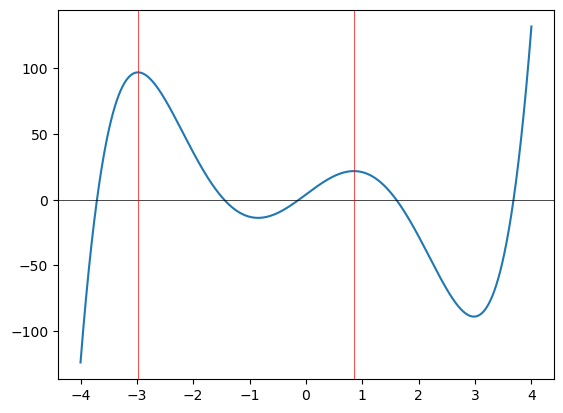

In [23]:
# Let's also test it

M0 = maximize(h, h_x, -2, 1e-3)
M1 = maximize(h, h_x,  0, 1e-3)

x = np.linspace(-4, 4, 8001)
plt.plot(x, h(x))
plt.axhline(y=0,  color='k', lw=0.5)
plt.axvline(x=M0, color='r', lw=0.5)
plt.axvline(x=M1, color='r', lw=0.5)

## How Good is our Optimizer?

* We just implemented a gradient descent method. We can now solve some problem that even the greatest mathematicians cannot solve

* However, this is too good to be true.  While gradient descent is a generic enough method, there are many traps that we may fall into that break our optimizer.

* Instead of learning a more complicated optimization algorithm, let's try to break our gradient descent method and then fix it.

In [24]:
# We used 1e-3 as the step size; what if we change it to a larger step?

m1 = minimize(h, h_x, 2, 1e-2)

Exception: Too many iterations

In [ ]:
# What's going on?
# To understand why the algorithm breaks, let's modify our
# gradient descent method output more information.

def minimize(f, f_x, x, alpha, acc=1e-3, nmax=1000):
    l = np.array([x])
    for _ in range(nmax):
        y   = f(x)
        y_x = f_x(x)
        if abs(y_x) <= acc:
            return l
        x -= alpha * y_x
        l = np.append(l, x)
            
    raise Exception("Too many iterations", l)

In [ ]:
try:
    l1 = minimize(h, h_x, 2, 1e-2)
except Exception as e:
    print('Failed')
    l1 = e.args[1]
    
print(l1)

Failed
[2.         2.8        3.16992    ... 3.2242049  2.49072544 3.2242049 ]


(-100.0, -50.0)

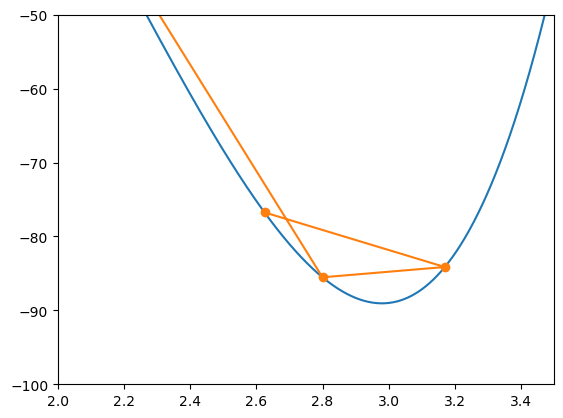

In [ ]:
n = 4
    
x = np.linspace(-4, 4, 8001)
plt.plot(x, h(x))
plt.plot(l1[:n], h(l1[:n]), 'o-')
plt.axhline(y=0,  color='k', lw=0.5)
plt.xlim(2, 3.5)
plt.ylim(-100, -50)

## Take Away

* For simpmle gradient descent, the step size is important.

* If a step is too big, it ends up jumping around the extrema without reaching the accuracy requirements.

* Adjusting the step size to reach a fast and accurate convergence is called *hyperparameter tuning*.

* There are many algorithms to automatically adjust the step size.

* However, for this course, we simply adjust the step size by visually inspecting the results.

## Moving on to Multidimensional Problems

* Because gradient descent is so simple, we can trivially generalize it to multiple variables.

* This will enables to solve much more interesting questions including curve fittings, or even physics problems that uses the action principle.

* The basic idea is that, instead of moving left or right in one dimension, the vector of derivatives gives you the gradient of the function.

* For simplicity, we will move one direction at a time.

In [ ]:
# Let's implement a two-dimension minimizer

def minimize(f, f_x, f_y, x, y, alpha, acc=1e-3, nmax=1000):
    l = np.array([x, y])
    for i in range(nmax):
        z   = f(x, y)
        z_x = f_x(x, y)
        z_y = f_y(x, y)
        if z_x*z_x + z_y*z_y <= acc * acc: # amplitude of derivative vector
            return l
        if i % 2 == 0:
            x -= alpha * z_x
        else:
            y -= alpha * z_y
        l = np.vstack((l, [x, y]))
            
    raise Exception("Too many iterations", l)

[1.99958462 0.99974039]


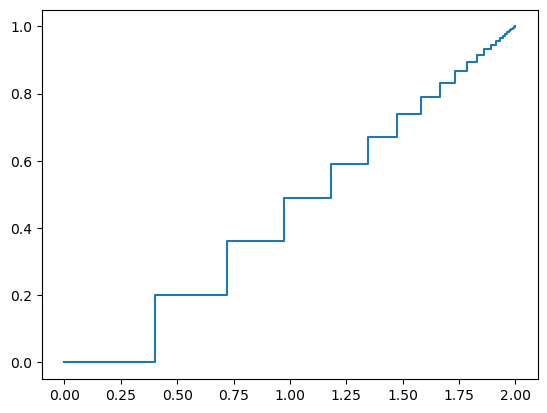

In [ ]:
# Test our implementation

def g(x, y):
    return (x - 2)**2 + (y - 1)**2

def g_x(x, y):
    return 2 * (x - 2)

def g_y(x, y):
    return 2 * (y - 1)

try:
    l1 = minimize(g, g_x, g_y, 0, 0, 0.1)
except Exception as e:
    print('Failed')
    l1 = e.args[1]
    
print(l1[-1,:])
plt.plot(l1[:,0], l1[:,1])

# you can see it approaches x = 2 and y = 1 which is the min point

## Summary

* Optimization is an important field in mathematics with many applications

* Numerical optimizers can help us find extrema of complicated functions

* The gradient descent method is extremely simple but powerful